In [1]:
import nltk
import matplotlib
from nltk.book import *
import matplotlib.pyplot as plt
from nltk.draw.dispersion import dispersion_plot
import re

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# <div align='center'> Task 1</div>

In [2]:
text = text1
text

<Text: Moby Dick by Herman Melville 1851>

In [3]:
frequency = FreqDist(text)

## Words that are hapaxes (unique) and those that occur less than 5 times

In [4]:
print(f"• Words that are hapaxes (unique) and those that occur less than 5 times :\n\n {[word for word, freq in  frequency.items() if freq < 5]}")

• Words that are hapaxes (unique) and those that occur less than 5 times :

 ['[', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', 'Supplied', 'Late', 'Consumptive', 'Usher', 'Grammar', 'School', 'threadbare', 'dusting', 'lexicons', 'grammars', 'mockingly', 'embellished', 'flags', 'loved', 'reminded', 'mortality', 'H', 'signification', 'deliver', 'HACKLUYT', 'Sw', 'Dan', 'HVAL', 'roundness', 'HVALT', 'vaulted', 'WEBSTER', 'DICTIONARY', 'Dut', 'Ger', 'WALLEN', 'WALW', 'IAN', 'wallow', 'RICHARDSON', 'KETOS', 'GREEK', 'CETUS', 'LATIN', 'WHOEL', 'ANGLO', 'SAXON', 'DANISH', 'WAL', 'DUTCH', 'HWAL', 'SWEDISH', 'ICELANDIC', 'ENGLISH', 'BALEINE', 'BALLENA', 'SPANISH', 'PEKEE', 'NUEE', 'FEGEE', 'ERROMANGOAN', 'EXTRACTS', 'Librarian', 'painstaking', 'burrower', 'grub', 'Vaticans', 'stalls', 'picking', 'anyways', 'profane', 'higgledy', 'piggledy', 'statements', 'authentic', 'extracts', 'veritable', 'gospel', 'cetology', 'Far', 'authors', 'poets', 'appearing', 'entertaining', 'affording', 'promiscu

## Draw a plot showing mapping from word length to word frequency

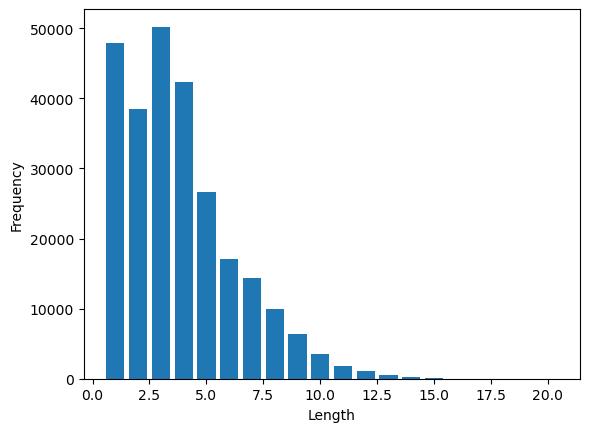

In [5]:
word_lengths = {}
for word, freq in frequency.items():
    length = len(word)
    if length not in word_lengths:
        word_lengths[length] = 0
    word_lengths[length] += freq

plt.bar(list(word_lengths.keys()), list(word_lengths.values()))
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

## Find 10 most frequent words occurring at the end of the sentence

In [6]:
sentences = nltk.tokenize.sent_tokenize(' '.join(text))
last_words = [re.sub(r'[^a-zA-Z\s]', '', sentence).split()[-1] for sentence in sentences if len(re.sub(r'[^a-zA-Z\s]', '', sentence).split())]
FreqDist(last_words).most_common(10)

[('it', 239),
 ('him', 152),
 ('whale', 98),
 ('me', 92),
 ('there', 86),
 ('sea', 75),
 ('Mr', 63),
 ('man', 62),
 ('them', 62),
 ('ye', 59)]

# <div align='center'> Task 2</div>

In [7]:
f = open ("/Users/pasha/nltk_data/corpora/gutenberg/austen-emma.txt" , "r" )
raw = f.read()
tokens = nltk.word_tokenize(raw)
text = nltk.Text(tokens)
text

<Text: Emma by Jane Austen 1816>

In [8]:
text.concordance("distress")

Displaying 19 of 19 matches:
s in the world with very little to distress or vex her . She was the youngest 
ding-cake , which had been a great distress to him , was all eat up . His own 
f December . But no sooner was the distress known to Mr. Elton , than it was r
of powerful operation ; and if the distress be not poignant enough to keep the
f there being any thing in them to distress her . Jane desired me to do it , s
 , Emma , to dissipate some of the distress it occasioned , judged it best for
` mine was a random guess . Do not distress her . '' He shook his head with a 
ld be awkward ; Mrs. Weston was in distress about the supper ; and Mr. Woodhou
fferent way ; she , in some little distress ; and he , finding every thing per
unce his name without the smallest distress . I certainly get better and bette
t would only be giving trouble and distress . Some are gone to the ponds , and
dly ; but there was a very general distress and disturbance on Miss Fairfax 's
 will do you good to sp

In [9]:
text.similar("distress")

time believe by in her she who friend think herself all be pleasure
find meet evil visit give name know


In [10]:
FreqDist(text)

FreqDist({',': 12016, '.': 6355, 'to': 5125, 'the': 4844, 'and': 4653, 'of': 4272, 'I': 3177, '--': 3100, 'a': 3001, "''": 2452, ...})

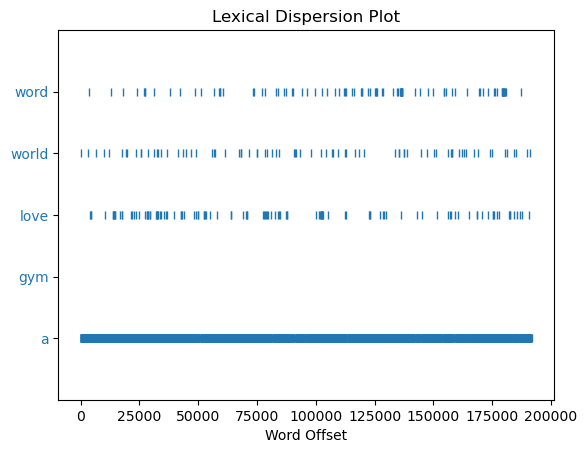

In [11]:
words = ['word','world', 'love', 'gym', "a"]

ax = dispersion_plot(text, words)
ax.set_yticks(list(range(len(words))), reversed(words), color="C0")

plt.show()

# <div align='center'> Task 3</div>

In [12]:
text = "first amount is $123.45, second amount is $400, 3 amount is $400.3333, $500.12234"

In [13]:
def collect_mooney_info(text_):
    return sum([float(amount[1:]) for amount in re.findall(r"\$\d+(?:\.\d{1,10})?", text_)])

In [14]:
collect_mooney_info(text)

1423.90564

# <div align='center'> Task 4</div>

In [18]:
json_file = """{
    "HTTPHost": "localhost",
    "HTTPPort" : 8545,
    "Config": {
        "Enabled"  : "true",
        "Server": "wakuv2.prod",
        "Nodes": 
        [ 
            "8.210.222.231", 
            "168.166.125.145", 
            "18.166.125.141",
            "183.166.125.141",
        ]
}}"""

In [19]:
def convert_json_file(json_str):
    server_info = re.findall(r'("Server":\s*")([^"]*)(")', json_file)[0][1].split(".")
    json_str = re.sub(r'("Server":\s*")([^"]*)(")', f"'Server': {{'name': ['{server_info[0]}'], 'type': ['{server_info[1]}']}}", json_str)
    nodes_info = [node for node in re.findall(r'"([^"]*)"', re.search(r'"Nodes":\s*\[([^\]]*)\]', json_file).group(1)) if not re.findall(r"^8+", node)]
    json_str = re.sub(r'"Nodes":\s*\[([^\]]*)\]', f"'Nodes': {nodes_info}", json_str)
    return json_str

In [20]:
x = convert_json_file(json_file)
print(x)

{
    "HTTPHost": "localhost",
    "HTTPPort" : 8545,
    "Config": {
        "Enabled"  : "true",
        'Server': {'name': ['wakuv2'], 'type': ['prod']},
        'Nodes': ['168.166.125.145', '18.166.125.141', '183.166.125.141']
}}
